In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('df_limpio.csv')


In [3]:
df.head()


id                                            license  beds  \
0   3176  First name and Last name: Nicolas Krotz <br/> ...   2.0   
1   9991                                  03/Z/RA/003410-18   4.0   
2  14325                                                NaN   1.0   
3  16644                                                NaN   1.0   
4  17904                                                NaN   1.0   

  bathrooms_text  price        room_type  accommodates  \
0         1 bath  105.0  Entire home/apt             4   
1      2.5 baths  180.0  Entire home/apt             7   
2         1 bath   70.0  Entire home/apt             1   
3         1 bath   90.0  Entire home/apt             4   
4         1 bath   25.0  Entire home/apt             2   

  neighbourhood_group_cleansed    neighbourhood_cleansed  \
0                       Pankow   Prenzlauer Berg Südwest   
1                       Pankow   Prenzlauer Berg Südwest   
2                       Pankow  Prenzlauer Berg Nordwest   
3     Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4                     Neukölln              Reuterstraße   

   maximum_maximum_nights  minimum_minimum_nights has_availability  \
0                     365                      63                t   
1                      14                       6                t   
2                    1125                     150                t   
3                     365                      93                t   
4                     365                      92                t   

   availability_365  is_valid_license  precio_medio  
0               272             False         105.0  
1                32              True         180.0  
2               185             False          70.0  
3                 0             False          90.0  
4                 1             False          25.0

In [4]:


# Asegúrate de que ambas columnas estén en formato numérico
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['precio_medio'] = df['precio_medio'].replace('[\$,]', '', regex=True).astype(float)

# Comparar las dos columnas y contar las diferencias
diferencias = df[df['price'] != df['precio_medio']].shape[0]

# Mostrar el resultado
print(f"Cantidad de valores distintos entre 'price' y 'precio_medio': {diferencias}")


Cantidad de valores distintos entre 'price' y 'precio_medio': 6979


In [5]:
df.describe().T


count          mean           std     min  \
id                      13759.0  3.529798e+17  4.588343e+17  3176.0   
beds                    13759.0  1.686532e+00  1.420956e+00     0.0   
price                   13759.0  1.410746e+02  8.263237e+02     0.0   
accommodates            13759.0  2.993968e+00  1.896326e+00     1.0   
maximum_maximum_nights  13759.0  1.093242e+06  4.842734e+07     1.0   
minimum_minimum_nights  13759.0  4.031732e+01  5.252650e+01     1.0   
availability_365        13759.0  1.253078e+02  1.294104e+02     0.0   
precio_medio            13759.0  1.391180e+02  8.053743e+02     0.0   

                               25%         50%           75%           max  
id                      18847564.0  42344255.0  8.461250e+17  1.184030e+18  
beds                           1.0         1.0  2.000000e+00  2.600000e+01  
price                         54.0        90.0  1.500000e+02  9.000000e+04  
accommodates                   2.0         2.0  4.000000e+00  1.600000e+01  
maximum_maximum_nights       200.0      1124.0  1.125000e+03  2.147484e+09  
minimum_minimum_nights         2.0         4.0  9.200000e+01  1.000000e+03  
availability_365               0.0        82.0  2.520000e+02  3.650000e+02  
precio_medio                  50.0        84.0  1.375476e+02  9.000000e+04

In [6]:




# Asegúrate de que la columna 'price' esté en formato numérico
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Calcular el percentil 99 de la columna 'price'
percentil_99 = df['price'].quantile(0.99)

# Filtrar el DataFrame para eliminar los valores por encima del percentil 99
df_filtered = df[df['price'] <= percentil_99].copy()

# Mostrar los resultados
print(df_filtered)


                        id                                            license  \
0                     3176  First name and Last name: Nicolas Krotz <br/> ...   
1                     9991                                  03/Z/RA/003410-18   
2                    14325                                                NaN   
3                    16644                                                NaN   
4                    17904                                                NaN   
5                    20858                                  03/Z/RA/006926-22   
6                    21869                                                NaN   
7                    22438                                                NaN   
8                    22677                                  01/Z/NA/004976-16   
9                    23834                                                NaN   
10                   28156                                                NaN   
11                   29279  

In [7]:
df_filtered.describe().T


count          mean           std     min  \
id                      13622.0  3.523955e+17  4.586734e+17  3176.0   
beds                    13622.0  1.676993e+00  1.402243e+00     0.0   
price                   13622.0  1.182505e+02  9.786137e+01     0.0   
accommodates            13622.0  2.972838e+00  1.847301e+00     1.0   
maximum_maximum_nights  13622.0  1.104230e+06  4.867014e+07     1.0   
minimum_minimum_nights  13622.0  4.057282e+01  5.263726e+01     1.0   
availability_365        13622.0  1.247003e+02  1.292945e+02     0.0   
precio_medio            13622.0  1.195768e+02  1.423121e+02     0.0   

                               25%           50%           75%           max  
id                      18695739.0  4.228804e+07  8.455601e+17  1.184030e+18  
beds                           1.0  1.000000e+00  2.000000e+00  2.600000e+01  
price                         53.0  8.900000e+01  1.500000e+02  7.500000e+02  
accommodates                   2.0  2.000000e+00  4.000000e+00  1.600000e+01  
maximum_maximum_nights       200.0  1.124000e+03  1.125000e+03  2.147484e+09  
minimum_minimum_nights         2.0  5.000000e+00  9.200000e+01  1.000000e+03  
availability_365               0.0  8.050000e+01  2.510000e+02  3.650000e+02  
precio_medio                  50.0  8.287949e+01  1.340000e+02  6.000000e+03

In [8]:


# Asegúrate de que la columna 'price' esté en formato numérico
df_filtered['price'] = df_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Filtrar el DataFrame para obtener solo las filas de "Charlottenburg-Wilm"
df_charlottenburg_wilm = df_filtered[df_filtered['neighbourhood_group_cleansed'] == 'Charlottenburg-Wilm.'].copy()

# Agrupar por 'id' y calcular el promedio del precio
promedio_precio_por_id = df_charlottenburg_wilm.groupby('id')['price'].mean().reset_index()

# Renombrar la columna 'price' a 'promedio_precio'
promedio_precio_por_id = promedio_precio_por_id.rename(columns={'price': 'promedio_precio'})

# Mostrar los resultados
promedio_precio_por_id.describe()


id  promedio_precio
count  1.365000e+03      1365.000000
mean   4.525296e+17       126.858454
std    4.803815e+17       103.701211
min    3.485400e+04        14.000000
25%    2.358920e+07        60.000000
50%    5.316061e+07        96.000000
75%    9.528643e+17       155.000000
max    1.183303e+18       714.000000

In [9]:
df_filtered.to_csv('df_limpio99.csv', index=False)


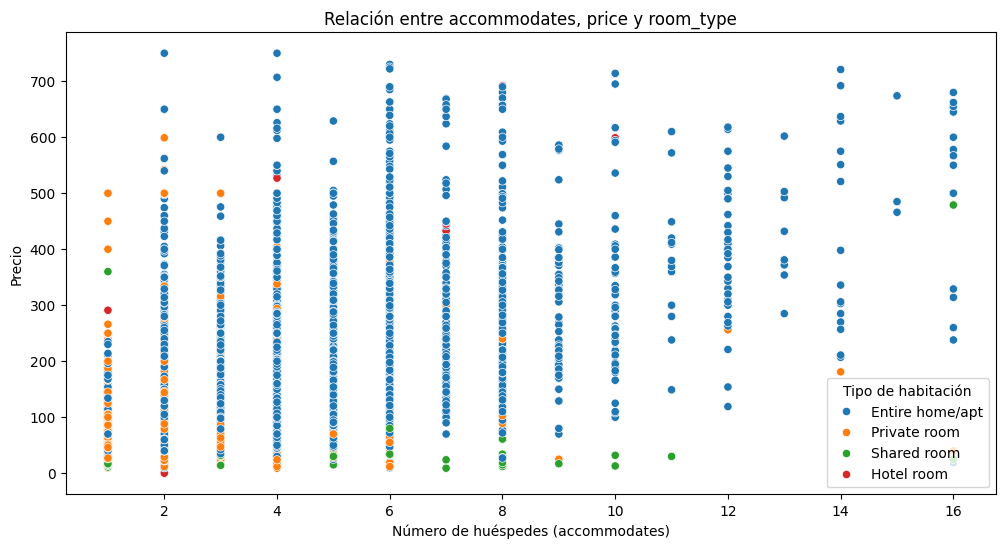

In [ ]:
# Crear un gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='accommodates', y='price', hue='room_type')
plt.title('Relación entre accommodates, price y room_type')
plt.xlabel('Número de huéspedes (accommodates)')
plt.ylabel('Precio')
plt.legend(title='Tipo de habitación')
plt.show()


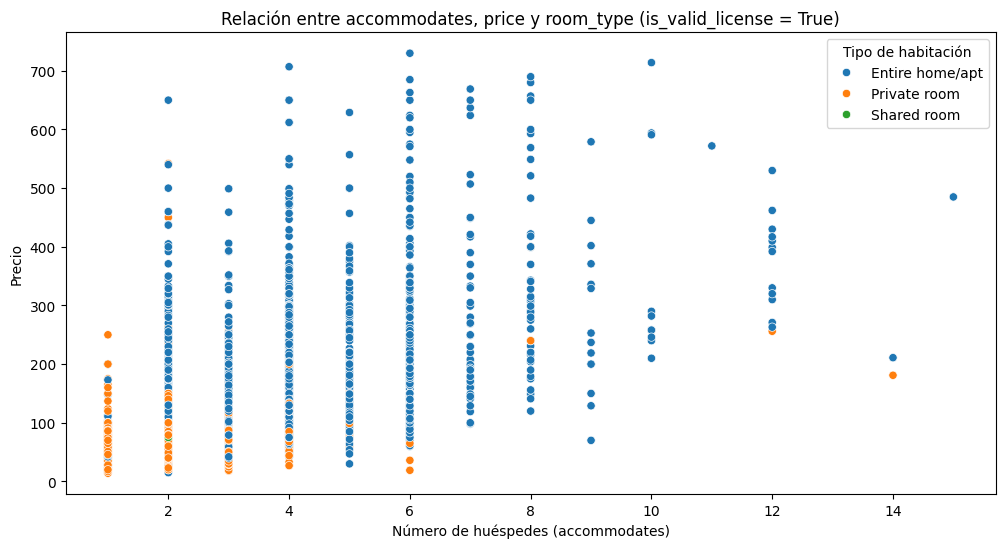

In [ ]:
# Filtrar los datos con 'is_valid_license' igual a True
df_valid = df_filtered[df_filtered['is_valid_license'] == True]

# Importar librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_valid, x='accommodates', y='price', hue='room_type')
plt.title('Relación entre accommodates, price y room_type (is_valid_license = True)')
plt.xlabel('Número de huéspedes (accommodates)')
plt.ylabel('Precio')
plt.legend(title='Tipo de habitación')
plt.show()
